In [25]:
import os
import soundfile as sf
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [26]:
soundfiles_path = './notebook/'
command_folders = {command : soundfiles_path + command for command in os.listdir(soundfiles_path)}
individual_commands_folders = {}

for command, command_folder in command_folders.items():
    files = os.listdir(command_folder)
    file_paths = []
    for file in files:
        #file_paths = [f'{command_folder}/{file}' for file in files ]
        numbers = set('1234567890')
        symbols_in_file = set(file)
        numbers_in_filename = set.intersection(numbers, symbols_in_file)

        if not numbers_in_filename:
            continue

        file_path = f'{command_folder}/{file}'
        file_paths.append(file_path)

    individual_commands_folders[command] = file_paths

print(command_folders)
print(individual_commands_folders) 

{'Вверх': './notebook/Вверх', 'Вниз': './notebook/Вниз', 'Вперёд': './notebook/Вперёд', 'Назад': './notebook/Назад', 'Налево': './notebook/Налево', 'Направо': './notebook/Направо', 'Осмотреться': './notebook/Осмотреться', 'Разворот': './notebook/Разворот', 'Сканировать': './notebook/Сканировать', 'Стоп': './notebook/Стоп', 'Увеличить': './notebook/Увеличить', 'Уменьшить': './notebook/Уменьшить'}
{'Вверх': ['./notebook/Вверх/Вверх1.wav', './notebook/Вверх/Вверх10.wav', './notebook/Вверх/Вверх2.wav', './notebook/Вверх/Вверх3.wav', './notebook/Вверх/Вверх4.wav', './notebook/Вверх/Вверх5.wav', './notebook/Вверх/Вверх6.wav', './notebook/Вверх/Вверх7.wav', './notebook/Вверх/Вверх8.wav', './notebook/Вверх/Вверх9.wav'], 'Вниз': ['./notebook/Вниз/Вниз1.wav', './notebook/Вниз/Вниз10.wav', './notebook/Вниз/Вниз2.wav', './notebook/Вниз/Вниз3.wav', './notebook/Вниз/Вниз4.wav', './notebook/Вниз/Вниз5.wav', './notebook/Вниз/Вниз6.wav', './notebook/Вниз/Вниз7.wav', './notebook/Вниз/Вниз8.wav', './note

In [27]:
def calc_mfcc(file_name, intersection = 0.5, frame_time = 10e-3, n_mfcc = 12):
    data, sr = sf.read(file_name)

    frame_width = round(sr * frame_time)
    hop_length = round(frame_width * intersection)

    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc = n_mfcc, hop_length = hop_length, win_length = frame_width)
    return mfcc

def calc_mfccs_from_files(individual_commands_folders, intersection = 0.5, frame_time = 10e-3, n_mfcc = 12):
    targets = []
    x = []
    x_avg = []
    for target, paths_list in individual_commands_folders.items():

        for x_path in paths_list:
            x_mfcc = calc_mfcc(x_path, intersection, frame_time, n_mfcc)

            targets.append(target)
            x.append(x_mfcc.flatten())
            x_avg.append(np.mean(x_mfcc, axis=1))
    return x, targets, x_avg

x, targets, x_avg = calc_mfccs_from_files(individual_commands_folders)

print(targets)
print(x[0].shape)

['Вверх', 'Вверх', 'Вверх', 'Вверх', 'Вверх', 'Вверх', 'Вверх', 'Вверх', 'Вверх', 'Вверх', 'Вниз', 'Вниз', 'Вниз', 'Вниз', 'Вниз', 'Вниз', 'Вниз', 'Вниз', 'Вниз', 'Вниз', 'Вперёд', 'Вперёд', 'Вперёд', 'Вперёд', 'Вперёд', 'Вперёд', 'Вперёд', 'Вперёд', 'Вперёд', 'Вперёд', 'Назад', 'Назад', 'Назад', 'Назад', 'Назад', 'Назад', 'Назад', 'Назад', 'Назад', 'Назад', 'Налево', 'Налево', 'Налево', 'Налево', 'Налево', 'Налево', 'Налево', 'Налево', 'Налево', 'Налево', 'Направо', 'Направо', 'Направо', 'Направо', 'Направо', 'Направо', 'Направо', 'Направо', 'Направо', 'Направо', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Осмотреться', 'Разворот', 'Разворот', 'Разворот', 'Разворот', 'Разворот', 'Разворот', 'Разворот', 'Разворот', 'Разворот', 'Разворот', 'Сканировать', 'Сканировать', 'Сканировать', 'Сканировать', 'Сканировать', 'Сканировать', 'Сканировать', 'Сканировать', 'Сканировать', 'Сканировать', 'Стоп', '

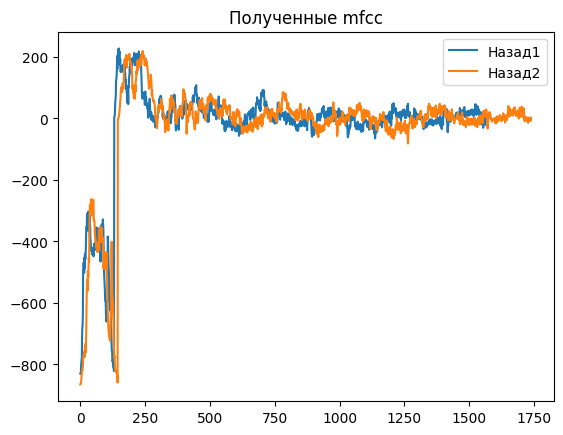

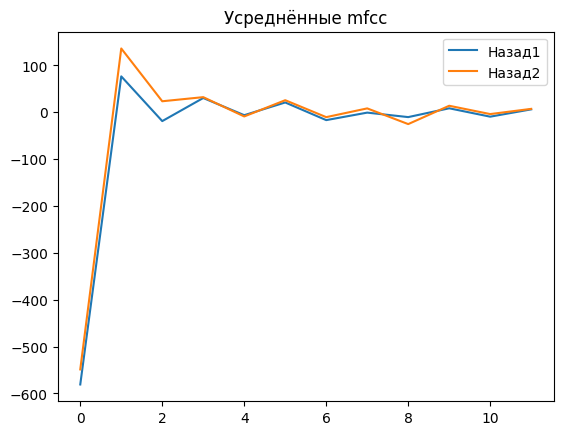

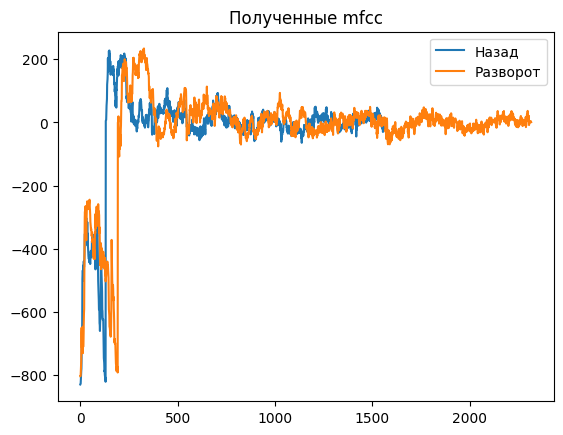

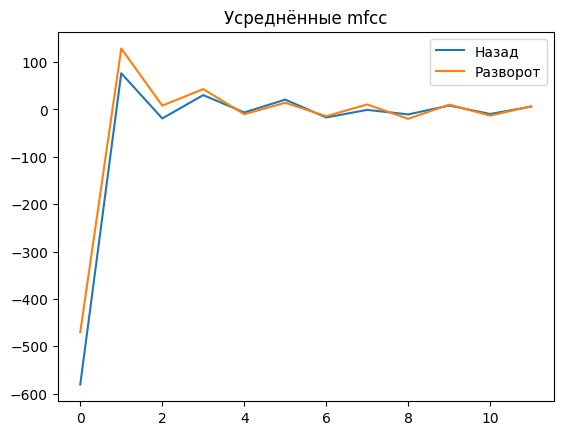

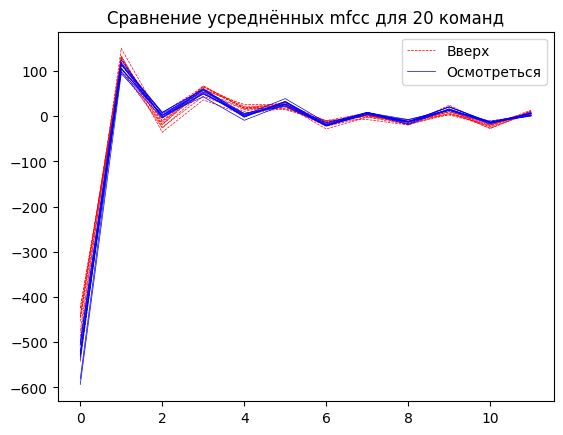

In [28]:
back1 = x[34]
back2 = x[35]
plt.plot(back1, label='Назад1')
plt.plot(back2, label='Назад2')
plt.legend()
plt.title('Полученные mfcc')
plt.show()

back1_avg = x_avg[33]
back2_avg = x_avg[35]
plt.plot(back1_avg, label='Назад1')
plt.plot(back2_avg, label='Назад2')
plt.legend()
plt.title('Усреднённые mfcc')
plt.show()

around = x[75]
plt.plot(back1, label='Назад')
plt.plot(around, label='Разворот')
plt.legend()
plt.title('Полученные mfcc')
plt.show()

around_avg = x_avg[75]
plt.plot(back1_avg, label='Назад')
plt.plot(around_avg, label='Разворот')
plt.legend()
plt.title('Усреднённые mfcc')
plt.show()

for i, target in enumerate(targets):
    if not(target == 'Вверх' or target == 'Осмотреться'):
        continue
    
    if target == 'Вверх':
        color = 'r--'
    else:
        color = 'b'
    x_data = x_avg[i]
    if i % 10 == 0:
        plt.plot(x_data, color, label=target, linewidth=0.5)
    else:
        plt.plot(x_data, color, linewidth=0.5)
plt.legend()
plt.title('Сравнение усреднённых mfcc для 20 команд')
plt.show()

c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1056
  warnings.warn(


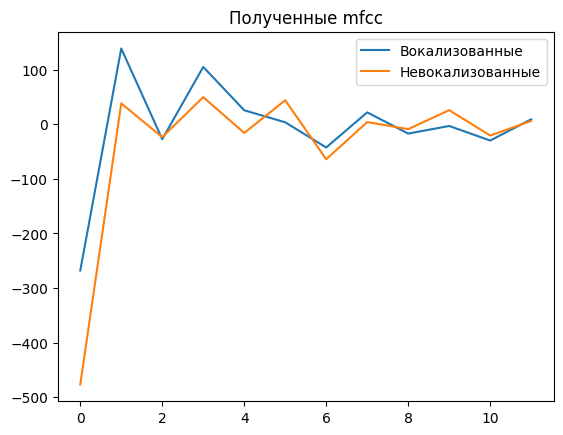

In [29]:
vowel_path = './vowel_scan1.wav'
consonant_path = './consonant_scan1.wav'

# x_avg.append(np.mean(x_mfcc, axis=1))
vowel_mfcc = np.mean(calc_mfcc(vowel_path), axis=1)
consonant_mfcc = np.mean(calc_mfcc(consonant_path), axis=1)

plt.plot(vowel_mfcc, label='Вокализованные')
plt.plot(consonant_mfcc, label='Невокализованные')
plt.legend()
plt.title('Полученные mfcc')
plt.show()

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from fastdtw import fastdtw
from tqdm import tqdm

In [31]:
class DTWClassifier:
    def __init__(self):
        pass
    
    @staticmethod
    def dtw_metric(x, y):
        return fastdtw(x, y)[0]   
    
    def fit(self, train_values, targets):
        self.train_values = train_values
        self.targets = targets

    def predict(self, value):
        min_metric = np.inf
        min_metric_i = -1
        for i, train_value in enumerate(self.train_values):
            cur_metric = DTWClassifier.dtw_metric(train_value, value)
            if cur_metric < min_metric:
                min_metric = cur_metric
                min_metric_i = i

        return self.targets[min_metric_i]

    def score(self, values, targets):
        total = len(values)
        correct = 0
        for value, target in tqdm(list(zip(values, targets))):
            predicted_target = self.predict(value)
            if predicted_target == target:
                correct += 1
        
        accuracy = correct / total
        return accuracy

In [32]:
def get_train_test(x, targets, test_size=0.2, random_state=42):
    max_len = 0
    for x_elem in x:
        cur_len = len(x_elem)
        if cur_len > max_len:
            max_len = cur_len

    x_unified = []
    for x_elem in x:
        need_zeros = max_len - len(x_elem)
        if need_zeros:
            x_unified.append(np.pad(x_elem, (0, need_zeros), mode='constant'))
        else:
            x_unified.append(x_elem)
    return train_test_split(x_unified, targets, test_size=test_size, random_state=random_state)

x_train, x_test, y_train, y_test = get_train_test(x_avg, targets)


knn = KNeighborsClassifier(n_neighbors=3, metric=DTWClassifier.dtw_metric)
knn.fit(x_train, y_train)
accuracy = knn.score(x_test, y_test)
print(accuracy)

0.875


In [33]:
classifier = DTWClassifier()
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)

100%|██████████| 24/24 [00:01<00:00, 13.42it/s]


0.7916666666666666

In [34]:
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder  

class NN:
  def initialize_nn_model(self, x_train):
    norm = tf.keras.layers.Normalization(axis=-1)
    norm.adapt(np.array(x_train))

    self.model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(np.array(x_train).shape[1],)),
      norm,
      tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(1e-5)),
      tf.keras.layers.Dense(16, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=l2(1e-5)),
      tf.keras.layers.Dense(12, activation='softmax')
    ])

    self.model.compile(optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])
    
  
  def fit(self, x_train, y_train):
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    self.initialize_nn_model(x_train)

    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=False
    )

    self.le = LabelEncoder()
    y_train_enc = self.le.fit_transform(y_train)
    self.model.fit(np.array(x_train), 
              np.array(y_train_enc), 
              epochs=1000,
              validation_split=0.2,
              callbacks=[early_stop]
    )
  
  def evaluate(self, x, y):
    y = np.array(y)
    y_enc = self.le.transform(y)
    return self.model.evaluate(np.array(x), np.array(y_enc))
  
  def predict(self, x):
    x = np.array(x)
    return self.model.predict(x)
  
  def score(self, x, y):
    return self.evaluate(x, y)[1]

In [35]:
nn = NN()
nn.fit(x_train, y_train)
nn.evaluate(x_test, y_test)

print(nn.model.summary())

Epoch 1/1000


c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.0526 - loss: 2.5161 - val_accuracy: 0.0500 - val_loss: 2.5621
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0658 - loss: 2.4843 - val_accuracy: 0.0500 - val_loss: 2.5438
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0658 - loss: 2.4585 - val_accuracy: 0.0000e+00 - val_loss: 2.5269
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0921 - loss: 2.4333 - val_accuracy: 0.0000e+00 - val_loss: 2.5123
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0921 - loss: 2.4096 - val_accuracy: 0.0500 - val_loss: 2.4975
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1184 - loss: 2.3866 - val_accuracy: 0.1000 - val_loss: 2.4839
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1579 - loss: 2.3635 - val_accuracy: 0.0500 - val_loss: 2.4694
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1842 - loss: 2.3416 - val_accuracy: 0.0500 - val_l

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 12)             │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 12)             │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,471 (13.57 KB)

 Trainable params: 1,148 (4.48 KB)

 Non-trainable params: 25 (104.00 B)

 Optimizer params: 2,298 (8.98 KB)

None


In [36]:
from time import perf_counter

class Pipeline:
    def __init__(self, classifier=DTWClassifier, intersection=0.5, n_mfcc=12):
        self.classifier = classifier()
        self.intersection = intersection
        self.n_mfcc = n_mfcc

    def fit(self, x, targets):
        self.classifier.fit(x, targets)

    def predict(self, x):
        return self.classifier.predict(x)

    def score(self, x, targets):
        return self.classifier.score(x, targets)

    def generate_fit_score(self):
        _, targets, x_avg = calc_mfccs_from_files(individual_commands_folders, intersection=self.intersection, n_mfcc=self.n_mfcc)
        x_train, x_test, y_train, y_test = get_train_test(x_avg, targets)

        self.fit(x_train, y_train)

        score_start = perf_counter()
        accuracy = self.score(x_test, y_test)
        score_end = perf_counter()

        time_spent_ms = (score_end - score_start) * 1000

        return accuracy, time_spent_ms
        

In [37]:
pipeline = Pipeline(DTWClassifier)
pipeline.generate_fit_score()

100%|██████████| 24/24 [00:01<00:00, 13.27it/s]


(0.7916666666666666, 1812.0792999397963)

In [38]:
pipeline = Pipeline(NN)
pipeline.generate_fit_score()

Epoch 1/1000


c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.0263 - loss: 2.6025 - val_accuracy: 0.0500 - val_loss: 2.3805
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0658 - loss: 2.5599 - val_accuracy: 0.1500 - val_loss: 2.3581
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0789 - loss: 2.5226 - val_accuracy: 0.2000 - val_loss: 2.3382
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1184 - loss: 2.4858 - val_accuracy: 0.2000 - val_loss: 2.3219
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1447 - loss: 2.4527 - val_accuracy: 0.2500 - val_loss: 2.3055
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1711 - loss: 2.4226 - val_accuracy: 0.2500 - val_loss: 2.2893
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2105 - loss: 2.3922 - val_accuracy: 0.2500 - val_loss: 2.2731
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2368 - loss: 2.3641 - val_accuracy: 0.2500 - val_loss: 2.2

(0.9583333134651184, 139.27150005474687)

In [39]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)  # отключить перенос строк
# Списки значений параметров
intersections = [0.25, 0.5, 0.75]   # Степень перекрытия
n_mfcc_list = [6, 12, 18]           # Кол-во признаков MFCC

# Пустой список для хранения результатов
results = []
dtw_pipelines = []
nn_pipelines = []
# Перебор комбинаций
idx = 1
for intersection in intersections:
    for n_mfcc in n_mfcc_list:
        # DTW
        pipeline_dtw = Pipeline(DTWClassifier, intersection=intersection, n_mfcc=n_mfcc)
        acc_dtw, time_dtw = pipeline_dtw.generate_fit_score()
        dtw_pipelines.append(pipeline_dtw)
        
        # NN
        pipeline_nn = Pipeline(NN, intersection=intersection, n_mfcc=n_mfcc)
        acc_nn, time_nn = pipeline_nn.generate_fit_score()
        nn_pipelines.append(pipeline_nn)
        
        # Добавляем строку в список
        results.append({
            "№": idx,
            "Степень перекрытия": intersection,
            "Кол-во инф. признаков": n_mfcc,
            "DTW точность": acc_dtw,
            "NN точность": acc_nn,
            "DTW время, мс": time_dtw,
            "NN время, мс": time_nn
        })
        idx += 1

# Создаем DataFrame
df = pd.DataFrame(results)

# Смотрим результат
print(df)

100%|██████████| 24/24 [00:00<00:00, 32.83it/s]


Epoch 1/1000


c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.0395 - loss: 2.5774 - val_accuracy: 0.0500 - val_loss: 2.5376
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0395 - loss: 2.5441 - val_accuracy: 0.0500 - val_loss: 2.5120
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0395 - loss: 2.5135 - val_accuracy: 0.0500 - val_loss: 2.4889
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0395 - loss: 2.4847 - val_accuracy: 0.0500 - val_loss: 2.4668
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0395 - loss: 2.4582 - val_accuracy: 0.0500 - val_loss: 2.4464
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0921 - loss: 2.4319 - val_accuracy: 0.0500 - val_loss: 2.4265
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1053 - loss: 2.4054 - val_accuracy: 0.1000 - val_loss: 2.4068
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1184 - loss: 2.3807 - val_accuracy: 0.1000 - val_loss: 2.3

100%|██████████| 24/24 [00:01<00:00, 12.86it/s]


Epoch 1/1000


c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.1184 - loss: 2.4001 - val_accuracy: 0.2000 - val_loss: 2.3564
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1184 - loss: 2.3555 - val_accuracy: 0.2000 - val_loss: 2.3328
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1316 - loss: 2.3166 - val_accuracy: 0.2000 - val_loss: 2.3106
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1579 - loss: 2.2782 - val_accuracy: 0.2000 - val_loss: 2.2885
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1842 - loss: 2.2417 - val_accuracy: 0.2000 - val_loss: 2.2671
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2368 - loss: 2.2043 - val_accuracy: 0.2000 - val_loss: 2.2459
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3026 - loss: 2.1699 - val_accuracy: 0.2500 - val_loss: 2.2261
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2895 - loss: 2.1339 - val_accuracy: 0.2500 - val_loss: 2.2

100%|██████████| 24/24 [00:02<00:00,  8.38it/s]


Epoch 1/1000


c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.1053 - loss: 2.6088 - val_accuracy: 0.1500 - val_loss: 2.4841
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1316 - loss: 2.5524 - val_accuracy: 0.1500 - val_loss: 2.4574
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1316 - loss: 2.5048 - val_accuracy: 0.1500 - val_loss: 2.4315
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1316 - loss: 2.4621 - val_accuracy: 0.1500 - val_loss: 2.4063
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1447 - loss: 2.4236 - val_accuracy: 0.1500 - val_loss: 2.3818
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1579 - loss: 2.3877 - val_accuracy: 0.1500 - val_loss: 2.3567
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1711 - loss: 2.3545 - val_accuracy: 0.1500 - val_loss: 2.3335
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1579 - loss: 2.3235 - val_accuracy: 0.2000 - val_loss: 2.3

100%|██████████| 24/24 [00:00<00:00, 36.11it/s]


Epoch 1/1000


c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.1579 - loss: 2.4598 - val_accuracy: 0.2000 - val_loss: 2.4557
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1974 - loss: 2.4295 - val_accuracy: 0.2500 - val_loss: 2.4363
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1974 - loss: 2.4009 - val_accuracy: 0.2500 - val_loss: 2.4168
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1974 - loss: 2.3739 - val_accuracy: 0.2000 - val_loss: 2.3975
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1974 - loss: 2.3466 - val_accuracy: 0.2500 - val_loss: 2.3785
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2105 - loss: 2.3227 - val_accuracy: 0.2500 - val_loss: 2.3607
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2105 - loss: 2.2971 - val_accuracy: 0.2000 - val_loss: 2.3439
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2105 - loss: 2.2722 - val_accuracy: 0.1500 - val_loss: 2.3

100%|██████████| 24/24 [00:01<00:00, 13.85it/s]


Epoch 1/1000


c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.0395 - loss: 2.6057 - val_accuracy: 0.0000e+00 - val_loss: 2.6226
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0395 - loss: 2.5539 - val_accuracy: 0.0000e+00 - val_loss: 2.5892
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0395 - loss: 2.5080 - val_accuracy: 0.0000e+00 - val_loss: 2.5583
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0395 - loss: 2.4635 - val_accuracy: 0.0000e+00 - val_loss: 2.5270
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0395 - loss: 2.4216 - val_accuracy: 0.0500 - val_loss: 2.4967
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0526 - loss: 2.3792 - val_accuracy: 0.0500 - val_loss: 2.4670
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0921 - loss: 2.3417 - val_accuracy: 0.1000 - val_loss: 2.4378
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1053 - loss: 2.3021 - val_accuracy: 0.1000

100%|██████████| 24/24 [00:02<00:00,  8.18it/s]


Epoch 1/1000


c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.1184 - loss: 2.3629 - val_accuracy: 0.0500 - val_loss: 2.5425
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1316 - loss: 2.3221 - val_accuracy: 0.1000 - val_loss: 2.5177
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1316 - loss: 2.2838 - val_accuracy: 0.1500 - val_loss: 2.4939
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1316 - loss: 2.2487 - val_accuracy: 0.2500 - val_loss: 2.4700
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1711 - loss: 2.2149 - val_accuracy: 0.2500 - val_loss: 2.4455
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2105 - loss: 2.1827 - val_accuracy: 0.2500 - val_loss: 2.4215
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2368 - loss: 2.1510 - val_accuracy: 0.2500 - val_loss: 2.3975
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3158 - loss: 2.1183 - val_accuracy: 0.2500 - val_loss: 2.3

100%|██████████| 24/24 [00:00<00:00, 34.98it/s]


Epoch 1/1000


c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - accuracy: 0.1579 - loss: 2.4630 - val_accuracy: 0.0500 - val_loss: 2.5735
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1711 - loss: 2.4357 - val_accuracy: 0.0500 - val_loss: 2.5504
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1711 - loss: 2.4091 - val_accuracy: 0.0500 - val_loss: 2.5287
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1579 - loss: 2.3846 - val_accuracy: 0.0500 - val_loss: 2.5090
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1974 - loss: 2.3610 - val_accuracy: 0.1000 - val_loss: 2.4897
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1974 - loss: 2.3374 - val_accuracy: 0.1000 - val_loss: 2.4713
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1974 - loss: 2.3157 - val_accuracy: 0.1000 - val_loss: 2.4540
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1974 - loss: 2.2938 - val_accuracy: 0.1000 - val_loss: 2.4

100%|██████████| 24/24 [00:01<00:00, 12.84it/s]


Epoch 1/1000


c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.0921 - loss: 2.5845 - val_accuracy: 0.1500 - val_loss: 2.5298
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1053 - loss: 2.5386 - val_accuracy: 0.1500 - val_loss: 2.5035
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1053 - loss: 2.4986 - val_accuracy: 0.1500 - val_loss: 2.4802
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1184 - loss: 2.4637 - val_accuracy: 0.1500 - val_loss: 2.4592
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1316 - loss: 2.4286 - val_accuracy: 0.1500 - val_loss: 2.4394
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1447 - loss: 2.3938 - val_accuracy: 0.1500 - val_loss: 2.4161
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1447 - loss: 2.3618 - val_accuracy: 0.1500 - val_loss: 2.3926
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1579 - loss: 2.3296 - val_accuracy: 0.1500 - val_loss: 2.3

100%|██████████| 24/24 [00:03<00:00,  7.46it/s]


Epoch 1/1000


c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.0921 - loss: 2.5129 - val_accuracy: 0.1500 - val_loss: 2.4582
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0921 - loss: 2.4586 - val_accuracy: 0.1500 - val_loss: 2.4323
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1579 - loss: 2.4123 - val_accuracy: 0.1500 - val_loss: 2.4074
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1842 - loss: 2.3675 - val_accuracy: 0.1500 - val_loss: 2.3848
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1842 - loss: 2.3256 - val_accuracy: 0.1500 - val_loss: 2.3631
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2105 - loss: 2.2841 - val_accuracy: 0.1500 - val_loss: 2.3415
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2763 - loss: 2.2452 - val_accuracy: 0.1500 - val_loss: 2.3188
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.2763 - loss: 2.2065 - val_accuracy: 0.1500 - val_loss: 2.2

In [40]:


print(df)

   №  Степень перекрытия  Кол-во инф. признаков  DTW точность  NN точность  DTW время, мс  NN время, мс
0  1                0.25                      6      0.791667     0.625000       735.6023      147.2208
1  2                0.25                     12      0.791667     0.916667      1870.0209      136.7234
2  3                0.25                     18      0.875000     0.875000      2867.1267      136.0683
3  4                0.50                      6      0.791667     0.625000       668.0208      135.6047
4  5                0.50                     12      0.791667     0.875000      1736.0903      140.4608
5  6                0.50                     18      0.833333     0.833333      2938.8478      145.8827
6  7                0.75                      6      0.708333     0.708333       690.3118      144.1416
7  8                0.75                     12      0.791667     0.875000      1873.1661      153.8289
8  9                0.75                     18      0.875000   

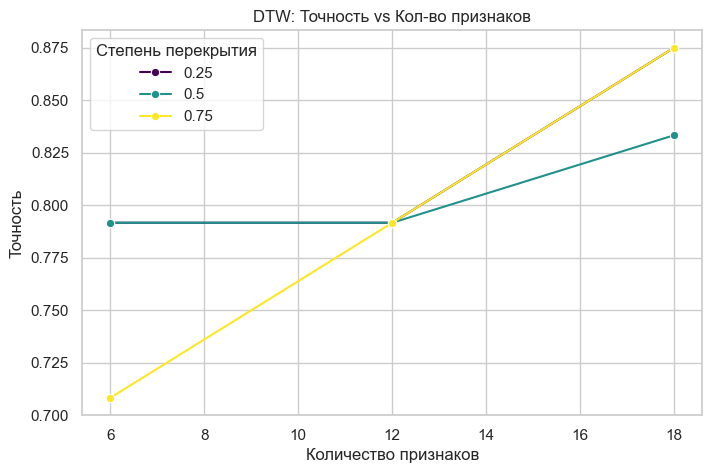

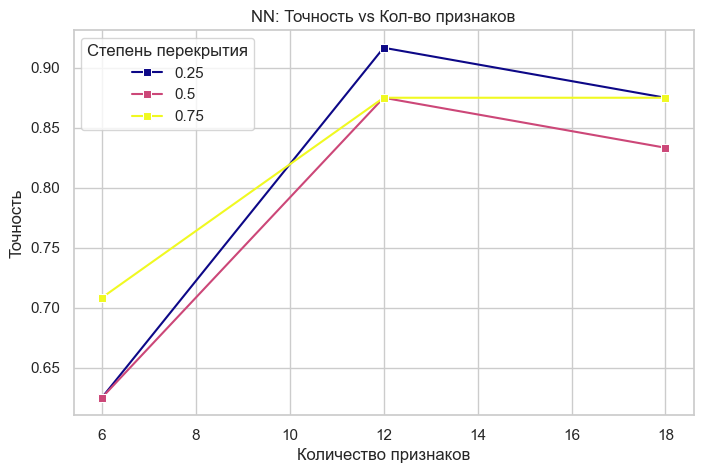

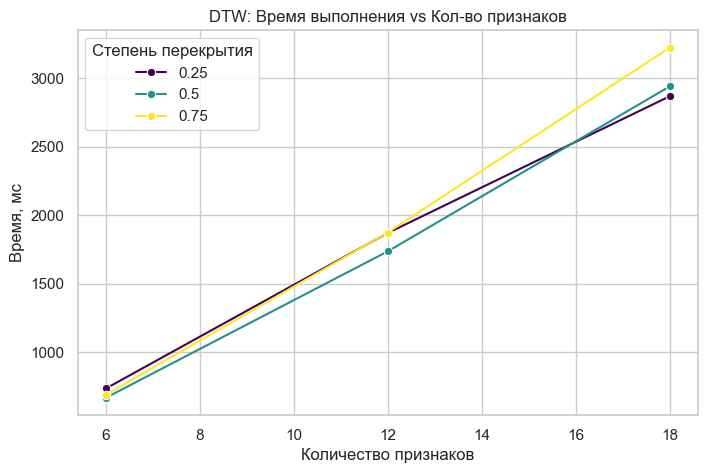

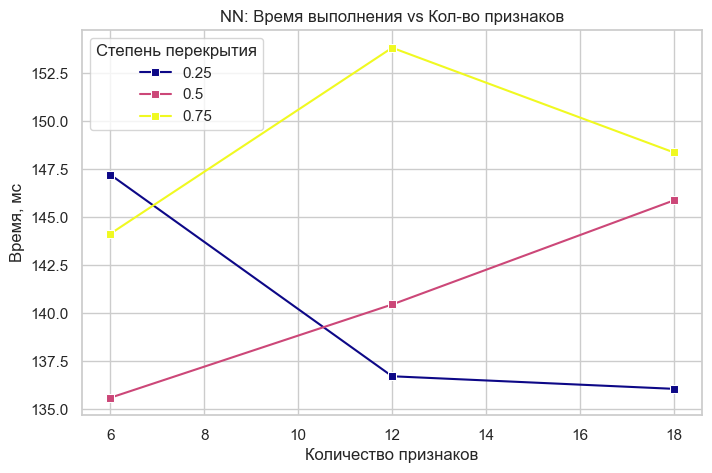

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предположим, df — твой датафрейм
sns.set(style="whitegrid")

# --- График точности DTW ---
plt.figure(figsize=(8,5))
sns.lineplot(data=df,
             x="Кол-во инф. признаков",
             y="DTW точность",
             hue="Степень перекрытия",
             marker="o",
             palette="viridis")  # разные цвета для разных степеней перекрытия
plt.title("DTW: Точность vs Кол-во признаков")
plt.xlabel("Количество признаков")
plt.ylabel("Точность")
plt.legend(title="Степень перекрытия")
plt.show()

# --- График точности NN ---
plt.figure(figsize=(8,5))
sns.lineplot(data=df,
             x="Кол-во инф. признаков",
             y="NN точность",
             hue="Степень перекрытия",
             marker="s",
             palette="plasma")
plt.title("NN: Точность vs Кол-во признаков")
plt.xlabel("Количество признаков")
plt.ylabel("Точность")
plt.legend(title="Степень перекрытия")
plt.show()

# --- График времени DTW ---
plt.figure(figsize=(8,5))
sns.lineplot(data=df,
             x="Кол-во инф. признаков",
             y="DTW время, мс",
             hue="Степень перекрытия",
             marker="o",
             palette="viridis")
plt.title("DTW: Время выполнения vs Кол-во признаков")
plt.xlabel("Количество признаков")
plt.ylabel("Время, мс")
plt.legend(title="Степень перекрытия")
plt.show()

# --- График времени NN ---
plt.figure(figsize=(8,5))
sns.lineplot(data=df,
             x="Кол-во инф. признаков",
             y="NN время, мс",
             hue="Степень перекрытия",
             marker="s",
             palette="plasma")
plt.title("NN: Время выполнения vs Кол-во признаков")
plt.xlabel("Количество признаков")
plt.ylabel("Время, мс")
plt.legend(title="Степень перекрытия")
plt.show()

In [44]:
print(dtw_pipelines)

[<__main__.Pipeline object at 0x00000288BFB3F530>, <__main__.Pipeline object at 0x00000288C012B080>, <__main__.Pipeline object at 0x00000288C180AC00>, <__main__.Pipeline object at 0x00000288C290C830>, <__main__.Pipeline object at 0x00000288C16C1550>, <__main__.Pipeline object at 0x00000288C14D7170>, <__main__.Pipeline object at 0x00000288C4BC4080>, <__main__.Pipeline object at 0x00000288C7445400>, <__main__.Pipeline object at 0x00000288B62AAFC0>]


In [42]:
vector = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Дополняем нулями до длины 100
padded_vector = np.pad(vector, (0, 90), mode='constant')
print(padded_vector)

[ 1  2  3  4  5  6  7  8  9 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


In [43]:

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

# model.compile(optimizer='adam',
#   loss='sparse_categorical_crossentropy',
#   metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=5)
# model.evaluate(x_test, y_test)